Template Matching

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [5]:
def take_roi(path_to_img):
    img = cv2.imread(path_to_img)
    bbox = cv2.selectROI(img, False)
    x, y, w, h = bbox[0], bbox[1], bbox[2], bbox[3]
    roi = img[y: y+h,x:x+w]
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    cv2.destroyAllWindows()
    
    return roi_gray

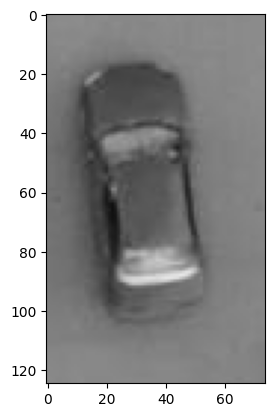

In [6]:
path0 = 'C:/Users/ABC/Desktop/VisDrone2019-VID-val/sequences/uav0000305_00000_v/0000001.jpg'
roi = take_roi(path0)
tempImg = roi

plt.figure()
plt.imshow(cv2.cvtColor(tempImg, cv2.COLOR_GRAY2BGR))

### Code for template-matching

In [46]:
methods = ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED']

    

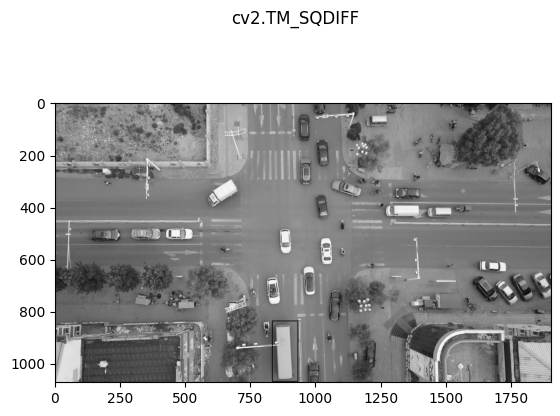

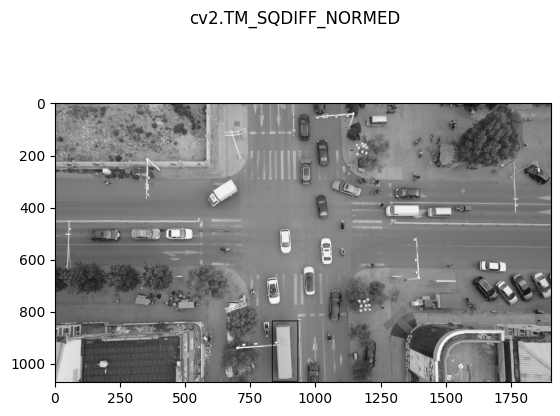

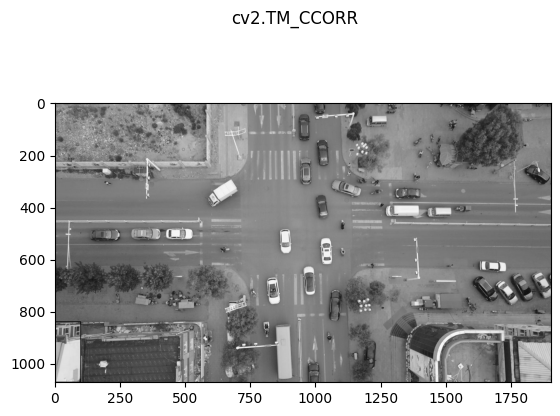

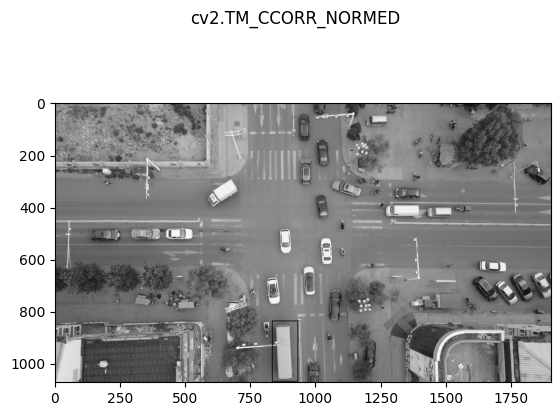

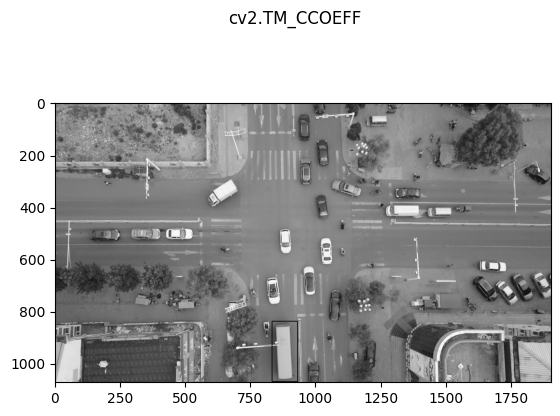

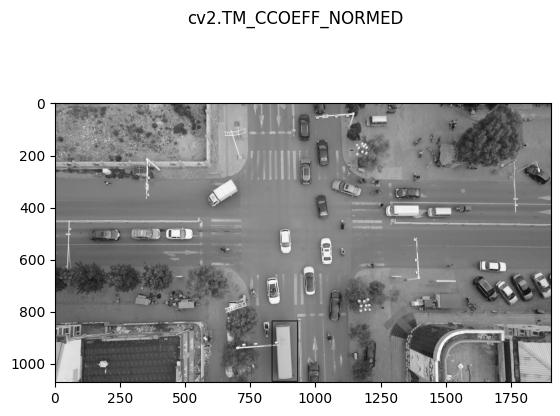

In [48]:
path1 = 'C:/Users/ABC/Desktop/VisDrone2019-VID-val/sequences/uav0000305_00000_v/0000033.jpg'
sourceImg = cv2.imread(path1, 0)
for method in methods:
    R = cv2.matchTemplate(sourceImg, tempImg, eval(method))
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(R)
    if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else: top_left = max_loc
    bottom_right = (top_left[0] + len(tempImg[0]), top_left[1] + len(tempImg))
    copy = sourceImg.copy()
    res = cv2.rectangle(copy, top_left, bottom_right, 0,2)
    plt.figure()
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_GRAY2BGR))
    plt.suptitle(method)


### Template matching on video

In [49]:
folder = 'C:/Users/ABC/Desktop/VisDrone2019-VID-val/sequences/uav0000305_00000_v'

list_jpg = os.listdir(folder)
filenames = [f for f in list_jpg]
filenames.sort()
full_paths=[]

for f in filenames:
    
    full_paths.append(folder+'/'+f)
roi = take_roi(full_paths[0])

methods = ['cv2.TM_SQDIFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF_NORMED']
method = methods[2]
for file in full_paths[1:]:
    img = cv2.imread(file)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    R = cv2.matchTemplate(img_gray, roi, eval(method))
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(R)
    if method =='cv2.TM_SQDIFF_NORMED':
        top_left = min_loc
        if min_val < 0.05:
            bottom_right = (top_left[0] + len(roi[0]), top_left[1] + len(roi))
            # print(top_left,min_val,max_val )
            cv2.rectangle(img, top_left, bottom_right, 0,2)
    else: 
        top_left = max_loc
        if max_val >0.55:
            bottom_right = (top_left[0] + len(roi[0]), top_left[1] + len(roi))
            cv2.rectangle(img, top_left, bottom_right, 0,2)
    cv2.imshow("Tracking", img)
    #press Esc to quit
    k = cv2.waitKey(1) & 0xff
    if k == 27 : break

cv2.destroyAllWindows()